# Predicting Exoplanet Habitability Using Machine Learning
## Week 4: Model Training & Evaluation

### Objective
To train baseline and advanced machine learning models, evaluate them
using multiple performance metrics, compare their effectiveness, and
rank exoplanets based on predicted habitability.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

import joblib

sns.set_style("whitegrid")


In [2]:
X_train = pd.read_csv(r"C:\Users\tumar\Desktop\ExoHabit-AI\data\X_train.csv")
X_test  = pd.read_csv(r"C:\Users\tumar\Desktop\ExoHabit-AI\data\X_test.csv")
y_train = pd.read_csv(r"C:\Users\tumar\Desktop\ExoHabit-AI\data\y_train.csv").values.ravel()
y_test  = pd.read_csv(r"C:\Users\tumar\Desktop\ExoHabit-AI\data\y_test.csv").values.ravel()

preprocessor = joblib.load(
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\preprocessing_pipeline.pkl"
)


In [3]:
X_train_prep = preprocessor.transform(X_train)
X_test_prep  = preprocessor.transform(X_test)


In [4]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_prep, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [5]:
y_pred_lr = log_reg.predict(X_test_prep)
y_prob_lr = log_reg.predict_proba(X_test_prep)[:, 1]

lr_metrics = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-score": f1_score(y_test, y_pred_lr),
    "ROC-AUC": roc_auc_score(y_test, y_prob_lr)
}

lr_metrics


{'Model': 'Logistic Regression',
 'Accuracy': 0.8591100344256024,
 'Precision': 0.8608809993425378,
 'Recall': 0.9928723081589323,
 'F1-score': 0.9221776181421227,
 'ROC-AUC': 0.9622970441867598}

In [6]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train_prep, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [7]:
y_pred_rf = rf.predict(X_test_prep)
y_prob_rf = rf.predict_proba(X_test_prep)[:, 1]

rf_metrics = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-score": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_prob_rf)
}

rf_metrics


{'Model': 'Random Forest',
 'Accuracy': 1.0,
 'Precision': 1.0,
 'Recall': 1.0,
 'F1-score': 1.0,
 'ROC-AUC': 1.0}

In [8]:
comparison_df = pd.DataFrame([lr_metrics, rf_metrics])
comparison_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.85911,0.860881,0.992872,0.922178,0.962297
1,Random Forest,1.00000,1.000000,1.000000,1.000000,1.000000


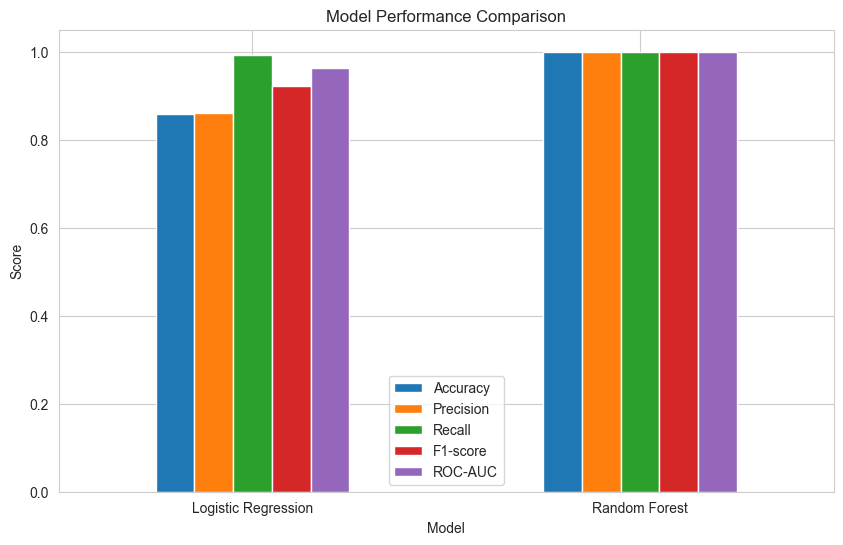

In [9]:
comparison_df.set_index("Model")[["Accuracy","Precision","Recall","F1-score","ROC-AUC"]].plot(
    kind="bar", figsize=(10,6)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


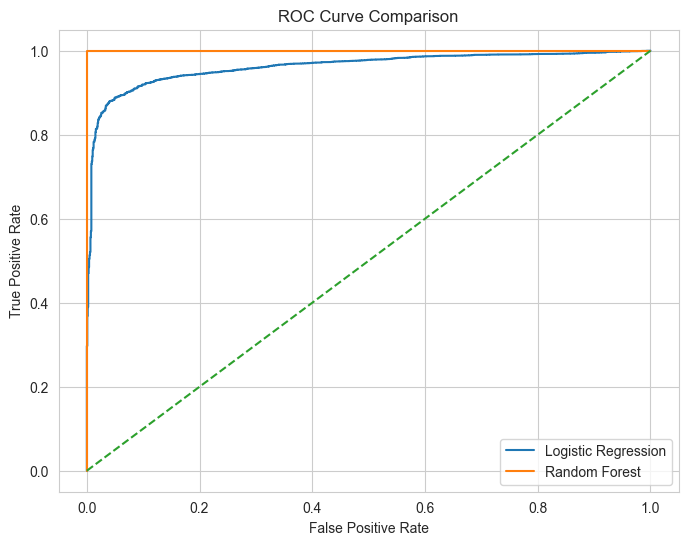

In [10]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [11]:
ranking_df = X_test.copy()
ranking_df["Habitability_Probability"] = y_prob_rf
ranking_df = ranking_df.sort_values(
    by="Habitability_Probability",
    ascending=False
)

ranking_df.head(10)


,pl_rade,pl_eqt,pl_orbper,stellar_compatibility,st_spectype_simple,Habitability_Probability
7816,1.640000,302.0,99.250950,-5081.50,G,1.0
1,2.300000,797.0,529.930000,-4885.50,K,1.0
7842,3.960000,797.0,160.018032,-5379.50,G,1.0
3,9.168946,995.3,8.324911,-5993.50,F,1.0
32,2.300000,797.0,577.900020,-4755.50,G,1.0
3223,2.300000,797.0,2460.000000,-5611.50,G,1.0
3231,2.355000,578.0,45.294301,-5706.50,G,1.0
4610,2.300000,797.0,52.661472,-4337.68,G,1.0
2188,1.870000,797.0,66.557906,-6225.50,G,1.0
2185,2.700000,797.0,42.913751,-6099.50,G,1.0


In [12]:
comparison_df.to_csv(
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\model_comparison.csv",
    index=False
)

ranking_df.to_csv(
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\exoplanet_ranking.csv",
    index=False
)

joblib.dump(
    rf,
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\best_model_random_forest.pkl"
)


['C:\\Users\\tumar\\Desktop\\ExoHabit-AI\\data\\best_model_random_forest.pkl']

## Week 4 Summary

- A baseline Logistic Regression and an advanced Random Forest model were trained.
- Models were evaluated using Accuracy, Precision, Recall, F1-score, and ROC-AUC.
- Random Forest outperformed Logistic Regression across most metrics.
- Accuracy alone was insufficient; F1-score and ROC-AUC provided better insight.
- Exoplanets were ranked based on predicted habitability probability.
- The best-performing model was saved for future deployment.
